In [4]:
import pandas as pd

# CSV dosyasını yükleyelim
file_path = 'lemmatized_data.csv'
df = pd.read_csv(file_path)

# İlk birkaç satırı inceleyelim
df.head()

,name,lemmatized_text
0,Breakfast for the lazy,"['put', 'cottage', 'cheese', 'wide', 'bowl', '..."
1,Breek breakfast,"['rinse', 'buckwheat', 'pour', 'cup', 'boiling..."
2,Childhood breakfast,"['grate', 'carrot', 'green', 'apple', 'middle'..."
3,French croutons for breakfast,"['mix', 'egg', 'milksaltdip', 'piece', 'loaf',..."
4,Low -calorie breakfast,"['boil', 'egg', 'boiledcut', 'cheese', 'tomato..."


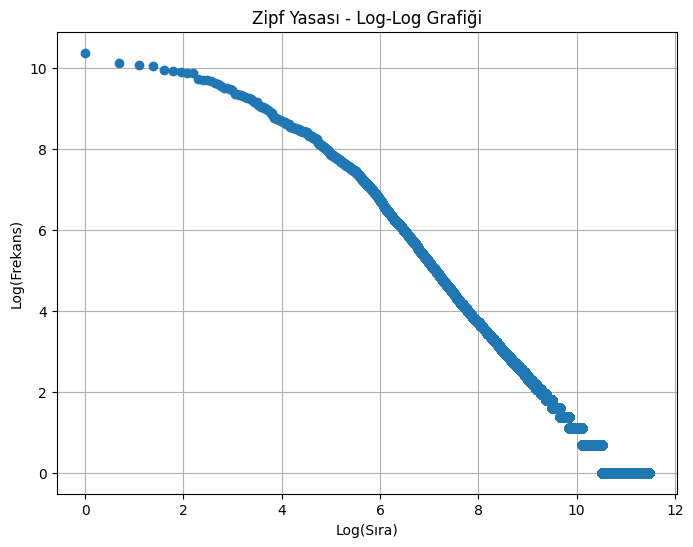

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

# 'lemmatized_text' sütununu kullanarak veriyi işleme
text_column = df['lemmatized_text'].dropna()

# Tüm kelimeleri birleştir ve frekansları hesapla
words = ' '.join(text_column).split()

# Kelime frekanslarını say
word_counts = Counter(words)

# Kelime frekanslarını azalan sıraya göre sıralayın
sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

# Kelimeleri ve frekansları ayır
words, freqs = zip(*sorted_word_counts)

# Log-log grafiğini oluşturma
plt.figure(figsize=(8, 6))

# Kelime frekanslarının logaritmasını ve sıralamasını al
log_freqs = np.log(freqs)
log_ranks = np.log(range(1, len(freqs) + 1))

plt.plot(log_ranks, log_freqs, marker='o', linestyle='None')

# Grafik başlığı ve etiketler
plt.title("Zipf Yasası - Log-Log Grafiği")
plt.xlabel("Log(Sıra)")
plt.ylabel("Log(Frekans)")

# Grafiği göster
plt.grid(True)
plt.show()


In [3]:


print(f"Veri çerçevesi boyutu: {df.shape}")  # (satır sayısı, sütun sayısı)


Veri çerçevesi boyutu: (37637, 2)


In [4]:
initial_rows = len(df)
print(f"Başlangıçtaki veri satırı: {initial_rows}")


Başlangıçtaki veri satırı: 37637


In [5]:
df_cleaned = df.dropna(subset=['lemmatized_text'])  # Boş satırları sil
final_rows = len(df_cleaned)
print(f"Temizlenmiş veri satırı: {final_rows}")


Temizlenmiş veri satırı: 37637


In [6]:
print(f"Elenen satır sayısı: {initial_rows - final_rows}")


Elenen satır sayısı: 0


In [7]:
words = [word for row in df_cleaned['lemmatized_text'] for word in eval(row)]
print(f"Toplam kelime sayısı: {len(words)}")


Toplam kelime sayısı: 2116393


In [8]:
unique_words = set(words)
print(f"Eşsiz kelime sayısı: {len(unique_words)}")


Eşsiz kelime sayısı: 92216
